In [1]:
!pip install scikeras

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.4/13.4 MB 52.4 MB/s eta 0:00:0000:010:01
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
bigframes 0.22.0 requires google-cloud-bigquery[bqstorage,pandas]>=3.10.0, but you have google-cloud-bigquery 2.34.4 which is incompatible.
bigframes 0.22.0 requires google-cloud-storage>=2.0.0, but you have google-cloud-storage 1.44.0 which is incompatible.
bigframes 0.22.0 requires pandas<2.1.4,>=1.5.0, but you have pandas 2.2.2 which is incompatible.
dataproc-jupyter-plugin 0.1.79 requires pydantic~=1.10.0, but you have pydantic 2.8.2 which is incompatible.
spaghetti 1.7.6 requires shapely>=2.0.1, but you have shapely 1.8.5.post1 which is incompatible.

In [2]:
# IMPORT NECESSARY LIBRARIES
import librosa
%matplotlib inline
import matplotlib.pyplot as plt
import librosa.display
from IPython.display import Audio
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
from keras import backend as K
from tensorflow.keras.models import Sequential, load_model
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import auc
from sklearn.metrics import roc_curve
import tensorflow as tf
from matplotlib.pyplot import specgram
import pandas as pd
from sklearn import datasets, metrics, model_selection, svm
from sklearn.metrics import confusion_matrix
# from sklearn.metrics import plot_roc_curve
from sklearn.metrics import RocCurveDisplay
from sklearn.datasets import make_classification
from sklearn.inspection import permutation_importance
import IPython.display as ipd  # To play sound in the notebook
import os # interface with underlying OS that python is running on
import sys
import soundfile as sf
import warnings
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, AveragePooling1D
from tensorflow.keras.layers import Input, Flatten, Dropout, Activation, BatchNormalization, Dense, LSTM
from sklearn.model_selection import GridSearchCV
# from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from scikeras.wrappers import KerasClassifier, KerasRegressor
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.regularizers import l2
import seaborn as sns
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import classification_report
seed=7
np.random.seed(seed)
from matplotlib.pyplot import specgram
import glob
import IPython.display as ipd  # To play sound in the notebook
import pickle
# ignore warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [3]:
data_set = "/kaggle/input/telugu-emotion-speech/telugu/"
# Run one example
dir_list = os.listdir(data_set)
dir_list[-8:]

['suprised', 'angry', 'sad', 'nuetral', 'happy']

In [4]:
# Initialize a list to store rows of the DataFrame
data = []
error_files=['/kaggle/input/telugu-emotion-speech/telugu/sad/S45_SRI_C01_G2_D04_SPKF21_V1_SA4_MMM.wav',
             '/kaggle/input/telugu-emotion-speech/telugu/sad/S45_SRI_C03_G1_D03_SPKF21_V1_SA4_MMM.wav']

# Loop through each directory and each file within the directory
for file_name in dir_list:
    dir_path = os.path.join(data_set, file_name)
    sub_dir = os.listdir(dir_path)
    for dire in sub_dir:
        file_path = os.path.join(dir_path, dire)
        emotion = file_name
        if file_path in error_files:
            continue
        data.append([emotion, file_path])

# Create a DataFrame from the data list
df = pd.DataFrame(data, columns=['emotion', 'path'])

In [5]:
df.head(5)

,emotion,path
0,suprised,/kaggle/input/telugu-emotion-speech/telugu/sup...
1,suprised,/kaggle/input/telugu-emotion-speech/telugu/sup...
2,suprised,/kaggle/input/telugu-emotion-speech/telugu/sup...
3,suprised,/kaggle/input/telugu-emotion-speech/telugu/sup...
4,suprised,/kaggle/input/telugu-emotion-speech/telugu/sup...


In [6]:
# index_to_drop = df[df['path'] == '/kaggle/input/telugu-emotion-speech/telugu/sad/S45_SRI_C01_G2_D04_SPKF21_V1_SA4_MMM.wav'].index
# # df = df.drop(index_to_drop)

In [7]:
# index_to_drop = df[df['path'] == '/kaggle/input/telugu-emotion-speech/telugu/sad/S45_SRI_C03_G1_D03_SPKF21_V1_SA4_MMM.wav'].index
# df = df.drop(index_to_drop)

In [8]:
ref = df
ref.head(10)

,emotion,path
0,suprised,/kaggle/input/telugu-emotion-speech/telugu/sup...
1,suprised,/kaggle/input/telugu-emotion-speech/telugu/sup...
2,suprised,/kaggle/input/telugu-emotion-speech/telugu/sup...
3,suprised,/kaggle/input/telugu-emotion-speech/telugu/sup...
4,suprised,/kaggle/input/telugu-emotion-speech/telugu/sup...
5,suprised,/kaggle/input/telugu-emotion-speech/telugu/sup...
6,suprised,/kaggle/input/telugu-emotion-speech/telugu/sup...
7,suprised,/kaggle/input/telugu-emotion-speech/telugu/sup...
8,suprised,/kaggle/input/telugu-emotion-speech/telugu/sup...
9,suprised,/kaggle/input/telugu-emotion-speech/telugu/sup...


In [9]:
# ENSURE GENDER,EMOTION, AND ACTOR COLUMN VALUES ARE CORRECT
pd.set_option('display.max_colwidth', None)
df.sample(100)

,emotion,path
330,nuetral,/kaggle/input/telugu-emotion-speech/telugu/nuetral/S95_SRI_C13_G1_D04_SPKM04_V1_NU5_MMM.wav
163,angry,/kaggle/input/telugu-emotion-speech/telugu/angry/S14_RAC_C11_G1_D01_SPKM03_V1_AN4_MMM.wav
206,sad,/kaggle/input/telugu-emotion-speech/telugu/sad/S41_HPP_C03_G1_D02_SPKM12_V1_SA5_MMM.wav
294,nuetral,/kaggle/input/telugu-emotion-speech/telugu/nuetral/S17_ASH_C05_G1_D01_SPKF06_V1_NU5_MMM.wav
129,angry,/kaggle/input/telugu-emotion-speech/telugu/angry/S45_SRI_C03_G1_D01_SPKF23_V1_AN4_MMM.wav
...,...,...
362,happy,/kaggle/input/telugu-emotion-speech/telugu/happy/S41_ISH_C02_G1_D04_SPKM12_V1_HA5_MMM.wav
32,suprised,/kaggle/input/telugu-emotion-speech/telugu/suprised/S96_DOC_C10_G1_D04_SPKM04_V1_SU4_MMM.wav
74,suprised,/kaggle/input/telugu-emotion-speech/telugu/suprised/S26_KIC_C25_G1_D04_SPKM11_V1_SU3_MMM.wav
277,nuetral,/kaggle/input/telugu-emotion-speech/telugu/nuetral/S95_SRI_C13_G1_D06_SPKM04_V1_NU5_MMM.wav


<Axes: ylabel='count'>

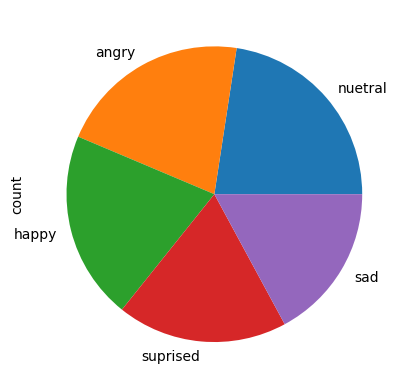

In [10]:
# LOOK AT DISTRIBUTION OF CLASSES
df.emotion.value_counts().plot(kind='pie')

In [11]:
ref=ref.groupby('emotion').head(150)
ref['emotion'].value_counts()

emotion
nuetral     103
angry        96
happy        94
suprised     85
sad          78
Name: count, dtype: int64

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 456 entries, 0 to 455
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   emotion  456 non-null    object
 1   path     456 non-null    object
dtypes: object(2)
memory usage: 7.2+ KB


In [13]:
!pip install resampy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 11.9 MB/s eta 0:00:0000:0100:01


In [14]:
import resampy
from resampy import resample
import librosa

In [15]:
# Note this takes a couple of minutes (~10 mins) as we're iterating over 4 datasets
df = pd.DataFrame(columns=['Features'])

# loop feature extraction over the entire dataset
counter=0
for index,path in enumerate(ref.path):
    X, sample_rate = librosa.load(path
                                  ,res_type='kaiser_fast'
                                  ,duration=3
                                  ,sr=44100
                                  ,offset=0.5
                                 )
    sample_rate = np.array(sample_rate)
    result = np.array([])

    # mean as the feature. Could do min and max etc as well.
    mfccs = np.mean(librosa.feature.mfcc(y=X,
                                        sr=sample_rate,
                                        n_mfcc=20),
                    axis=0)
    result=np.hstack((result, mfccs)) # stacking horizontally

    #get the mel-scaled spectrogram (ransform both the y-axis (frequency) to log scale, and the “color” axis (amplitude) to Decibels, which is kinda the log scale of amplitudes.)
    spectrogram = librosa.feature.melspectrogram(y=X, sr=sample_rate, n_mels=128,fmax=8000)
    db_spec = librosa.power_to_db(spectrogram)
    #temporally average spectrogram
    log_spectrogram = np.mean(db_spec, axis = 0)
    result=np.hstack((result, log_spectrogram)) # stacking horizontally

    # Chroma_stft
    stft = np.abs(librosa.stft(X))
    chroma_stft = np.mean(librosa.feature.chroma_stft(S=stft, sr=sample_rate).T, axis=0)
    result = np.hstack((result, chroma_stft)) # stacking horizontally

    # Root Mean Square Value
    rms = np.mean(librosa.feature.rms(y=X).T, axis=0)
    result = np.hstack((result, rms)) # stacking horizontally

    df.loc[counter] = [result]
    counter=counter+1


# Check a few records to make sure its processed successfully
print(len(df))
df.head()

456


,Features
0,"[-27.067138671875, -26.52118492126465, -27.35845947265625, -27.75271987915039, -27.447134017944336, -27.031047821044922, -26.559154510498047, -27.131505966186523, -26.918960571289062, -26.43503189086914, -26.135757446289062, -26.457956314086914, -26.809524536132812, -26.877239227294922, -26.070566177368164, -26.083831787109375, -26.4156551361084, -25.398265838623047, -24.360240936279297, -24.264171600341797, -24.23457145690918, -24.770645141601562, -26.53842544555664, -26.485645294189453, -26.520389556884766, -26.59576988220215, -25.324031829833984, -26.345733642578125, -25.894439697265625, -25.692785263061523, -24.759517669677734, -24.881017684936523, -25.171964645385742, -25.16852569580078, -24.881397247314453, -25.37546157836914, -25.579967498779297, -25.880126953125, -26.74490737915039, -27.522445678710938, -26.6134033203125, -25.733509063720703, -25.627063751220703, -25.832183837890625, -27.16720962524414, -26.997594833374023, -25.482044219970703, -23.760215759277344, -23.088457107543945, -20.44036293029785, -15.93628978729248, -11.383646011352539, -9.335600852966309, -2.451037883758545, 0.655762791633606, -0.06727312505245209, -1.5201243162155151, -0.41022124886512756, -2.777784824371338, -7.3029890060424805, -11.381402969360352, -14.171875, -16.817520141601562, -18.729995727539062, -18.371206283569336, -18.638755798339844, -17.610342025756836, -16.464792251586914, -15.551193237304688, -16.05215072631836, -16.713184356689453, -17.657718658447266, -16.56470489501953, -13.09507942199707, -13.251897811889648, -13.219583511352539, -12.483865737915039, -8.045912742614746, -6.1229047775268555, -7.58504581451416, -8.235872268676758, -5.984630107879639, -6.471564292907715, -10.313409805297852, -14.545117378234863, -17.370468139648438, -13.986719131469727, -11.689855575561523, -13.396093368530273, -15.036445617675781, -14.764315605163574, -13.418886184692383, -13.522590637207031, -14.539148330688477, -14.131080627441406, -13.952322006225586, -14.637802124023438, -14.592915534973145, -15.264175415039062, -17.35060691833496, ...]"
1,"[-16.33280372619629, -16.900590896606445, -18.82487678527832, -22.569665908813477, -24.202253341674805, -21.618541717529297, -21.633655548095703, -21.612014770507812, -21.0371036529541, -21.40713119506836, -21.194608688354492, -21.086002349853516, -20.258577346801758, -22.086538314819336, -21.03573989868164, -22.078353881835938, -22.467247009277344, -22.329450607299805, -23.801172256469727, -24.343156814575195, -24.040225982666016, -24.469579696655273, -23.246562957763672, -24.24256134033203, -25.09246063232422, -24.266700744628906, -24.413082122802734, -21.726665496826172, -15.399591445922852, -14.105435371398926, -13.262982368469238, -12.24130916595459, -11.458147048950195, -5.655146598815918, -3.814889430999756, -5.7800164222717285, -6.603579521179199, -3.3504135608673096, 0.10828270763158798, -1.3130242824554443, -5.384219169616699, -8.279151916503906, -11.835358619689941, -12.894800186157227, -9.98163890838623, -6.239755153656006, -6.191399574279785, -9.818674087524414, -12.166431427001953, -14.08100700378418, -16.79282569885254, -17.6756534576416, -16.388004302978516, -14.651029586791992, -11.244207382202148, -10.979284286499023, -13.796350479125977, -16.08391761779785, -15.893898010253906, -15.964460372924805, -16.816884994506836, -10.332247734069824, -1.1859180927276611, 0.7824165225028992, -1.333528757095337, -5.1793694496154785, -7.6637067794799805, -10.049670219421387, -11.098045349121094, -11.763652801513672, -13.417448043823242, -14.199908256530762, -15.151987075805664, -15.939106941223145, -15.49079704284668, -10.345192909240723, -8.054451942443848, -10.198797225952148, -15.591023445129395, -18.077280044555664, -9.173910140991211, -6.640875816345215, -6.54447078704834, -9.976785659790039, -14.701655387878418, -15.93976879119873, -17.343069076538086, -17.90119743347168, -19.105731964111328, -19.414020538330078, -18.823049545288086, -19.152042388916016, -17.201059341430664, -18

In [16]:
# Now extract the mean bands to its own feature columns
df = pd.concat([ref,pd.DataFrame(df['Features'].values.tolist())],axis=1)
df[:5]

,emotion,path,0,1,2,3,4,5,6,7,...,521,522,523,524,525,526,527,528,529,530
0,suprised,/kaggle/input/telugu-emotion-speech/telugu/suprised/S47_RVC_C03_G1_D04_SPKF21_V1_SU4_MMM.wav,-27.067139,-26.521185,-27.358459,-27.752720,-27.447134,-27.031048,-26.559155,-27.131506,...,0.572935,0.562674,0.608612,0.633088,0.675238,0.673200,0.649006,0.607055,0.613916,0.032615
1,suprised,/kaggle/input/telugu-emotion-speech/telugu/suprised/S95_BAB_CO2_G1_D02_SPKM02_V1_SU5_MMM.wav,-16.332804,-16.900591,-18.824877,-22.569666,-24.202253,-21.618542,-21.633656,-21.612015,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,suprised,/kaggle/input/telugu-emotion-speech/telugu/suprised/S95_SRI_C15_G2_D01_SPKF01_V2_SU5_MMM.wav,-28.145365,-27.398733,-28.912689,-29.227142,-28.905121,-28.677710,-28.046600,-27.327621,...,0.548397,0.564633,0.562374,0.489447,0.499103,0.544719,0.620397,0.597979,0.544478,0.018444
3,suprised,/kaggle/input/telugu-emotion-speech/telugu/suprised/S20_JUL_C07_G1_D04_SPKM09_V1_SU5_MMM.wav,-22.846615,-19.785255,-19.169708,-20.819546,-23.408640,-23.084574,-23.091030,-25.434277,...,0.683313,0.660852,0.633357,0.615163,0.636126,0.697209,0.696731,0.680953,0.715784,0.025031
4,suprised,/kaggle/input/telugu-emotion-speech/telugu/suprised/S15_RAN_C05_G1_D03_SPKF05_V1_SU4_MMM.wav,-15.407389,-16.397984,-18.543247,-16.584141,-16.210001,-5.559580,-1.439974,-1.486801,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
# replace NA with 0
df=df.fillna(0)
print(df.shape)
df[:5]

(456, 533)


,emotion,path,0,1,2,3,4,5,6,7,...,521,522,523,524,525,526,527,528,529,530
0,suprised,/kaggle/input/telugu-emotion-speech/telugu/suprised/S47_RVC_C03_G1_D04_SPKF21_V1_SU4_MMM.wav,-27.067139,-26.521185,-27.358459,-27.752720,-27.447134,-27.031048,-26.559155,-27.131506,...,0.572935,0.562674,0.608612,0.633088,0.675238,0.673200,0.649006,0.607055,0.613916,0.032615
1,suprised,/kaggle/input/telugu-emotion-speech/telugu/suprised/S95_BAB_CO2_G1_D02_SPKM02_V1_SU5_MMM.wav,-16.332804,-16.900591,-18.824877,-22.569666,-24.202253,-21.618542,-21.633656,-21.612015,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,suprised,/kaggle/input/telugu-emotion-speech/telugu/suprised/S95_SRI_C15_G2_D01_SPKF01_V2_SU5_MMM.wav,-28.145365,-27.398733,-28.912689,-29.227142,-28.905121,-28.677710,-28.046600,-27.327621,...,0.548397,0.564633,0.562374,0.489447,0.499103,0.544719,0.620397,0.597979,0.544478,0.018444
3,suprised,/kaggle/input/telugu-emotion-speech/telugu/suprised/S20_JUL_C07_G1_D04_SPKM09_V1_SU5_MMM.wav,-22.846615,-19.785255,-19.169708,-20.819546,-23.408640,-23.084574,-23.091030,-25.434277,...,0.683313,0.660852,0.633357,0.615163,0.636126,0.697209,0.696731,0.680953,0.715784,0.025031
4,suprised,/kaggle/input/telugu-emotion-speech/telugu/suprised/S15_RAN_C05_G1_D03_SPKF05_V1_SU4_MMM.wav,-15.407389,-16.397984,-18.543247,-16.584141,-16.210001,-5.559580,-1.439974,-1.486801,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [18]:
# Split between train and test
X_train, X_test, y_train, y_test = train_test_split(df.drop(['path','emotion'],axis=1)
                                                    , df.emotion
                                                    , test_size=0.20
                                                    , shuffle=True
                                                    , random_state=42
                                                   )

# Lets see how the data present itself before normalisation
X_train[150:160]

,0,1,2,3,4,5,6,7,8,9,...,521,522,523,524,525,526,527,528,529,530
277,-14.134829,-15.066872,-17.296164,-18.037413,-20.741817,-18.612890,-17.853237,-17.932257,-19.030624,-19.438972,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
442,-16.227840,-18.954418,-24.110140,-24.423508,-18.110121,-6.753493,-1.790541,-0.611213,-3.346076,-11.806526,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
320,-16.497980,-16.670536,-21.068089,-25.274961,-25.122875,-23.931850,-25.647045,-24.557882,-25.180965,-25.616505,...,0.690461,0.660840,0.636182,0.634053,0.677806,0.700967,0.720334,0.726666,0.750139,0.025498
272,-4.558024,-3.633691,-3.207385,-3.383898,-4.370435,-7.648001,-10.252271,-10.558984,-9.128008,-9.021169,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
414,-14.640038,-16.734974,-20.028202,-19.564798,-19.068516,-20.214878,-19.409344,-20.184790,-19.098614,-16.590965,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
454,-20.707159,-21.162981,-23.509830,-22.581930,-21.387348,-20.635418,-21.074356,-20.039467,-19.841602,-21.685581,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
125,-16.880056,-16.186234,-19.697033,-24.171501,-24.735823,-22.892467,-22.520252,-22.886429,-24.350986,-23.419964,...,0.730364,0.734697,0.681387,0.579722,0.538449,0.482801,0.471081,0.516060,0.562199,0.012571
146,-16.194719,-18.751871,-24.647778,-23.697323,-20.286797,-20.188330,-22.474648,-23.299362,-22.772945,-21.407879,...,0.389374,0.446348,0.456725,0.485824,0.504801,0.478440,0.495129,0.550563,0.571702,0.042769
349,-10.193057,-13.566974,-18.106956,-15.415629,-13.716263,-14.484619,-18.140093,-21.228039,-21.386692,-20.205521,...,0.558456,0.478100,0.468114,0.417520,0.517488,0.520259,0.470390,0.499188,0.563278,0.036838
274,-7.108685,-8.111687,-12.853876,-13.528897,-13.537355,-13.156651,-13.800467,-14.678897,-14.440211,-13.857910,...,0.764647,0.725177,0.687796,0.689720,0.709466,0.719708,0.684601,0.707249,0.762754,0.020281


In [19]:
df.head()

,emotion,path,0,1,2,3,4,5,6,7,...,521,522,523,524,525,526,527,528,529,530
0,suprised,/kaggle/input/telugu-emotion-speech/telugu/suprised/S47_RVC_C03_G1_D04_SPKF21_V1_SU4_MMM.wav,-27.067139,-26.521185,-27.358459,-27.752720,-27.447134,-27.031048,-26.559155,-27.131506,...,0.572935,0.562674,0.608612,0.633088,0.675238,0.673200,0.649006,0.607055,0.613916,0.032615
1,suprised,/kaggle/input/telugu-emotion-speech/telugu/suprised/S95_BAB_CO2_G1_D02_SPKM02_V1_SU5_MMM.wav,-16.332804,-16.900591,-18.824877,-22.569666,-24.202253,-21.618542,-21.633656,-21.612015,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,suprised,/kaggle/input/telugu-emotion-speech/telugu/suprised/S95_SRI_C15_G2_D01_SPKF01_V2_SU5_MMM.wav,-28.145365,-27.398733,-28.912689,-29.227142,-28.905121,-28.677710,-28.046600,-27.327621,...,0.548397,0.564633,0.562374,0.489447,0.499103,0.544719,0.620397,0.597979,0.544478,0.018444
3,suprised,/kaggle/input/telugu-emotion-speech/telugu/suprised/S20_JUL_C07_G1_D04_SPKM09_V1_SU5_MMM.wav,-22.846615,-19.785255,-19.169708,-20.819546,-23.408640,-23.084574,-23.091030,-25.434277,...,0.683313,0.660852,0.633357,0.615163,0.636126,0.697209,0.696731,0.680953,0.715784,0.025031
4,suprised,/kaggle/input/telugu-emotion-speech/telugu/suprised/S15_RAN_C05_G1_D03_SPKF05_V1_SU4_MMM.wav,-15.407389,-16.397984,-18.543247,-16.584141,-16.210001,-5.559580,-1.439974,-1.486801,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [20]:
print(df['emotion'].apply(type).value_counts())

emotion
<class 'str'>    456
Name: count, dtype: int64


In [21]:
# df['emotion'] = df['emotion'].astype(str)
# y_train = to_categorical(lb.fit_transform(y_train.astype(str)))
# y_test = to_categorical(lb.fit_transform(y_test.astype(str)))

In [22]:
# NORMALIZE DATA
mean = np.mean(X_train, axis=0)
std = np.std(X_train, axis=0)
X_train = (X_train - mean)/std
X_test = (X_test - mean)/std
# TURN DATA INTO ARRAYS FOR KERAS
X_train = np.array(X_train)
y_train = np.array(y_train)
X_test = np.array(X_test)
y_test = np.array(y_test)
# ONE HOT ENCODE THE TARGET
# CNN REQUIRES INPUT AND OUTPUT ARE NUMBERS
df['emotion'] = df['emotion'].astype(str)
y_train = df['emotion'].astype(str)
y_test = df['emotion'].astype(str)
lb = LabelEncoder()
y_train = to_categorical(lb.fit_transform(y_train))
y_test = to_categorical(lb.fit_transform(y_test))
print(y_test[0:10])
# RESHAPE DATA TO INCLUDE 3D TENSOR
X_train = X_train[:,:,np.newaxis]
X_test = X_test[:,:,np.newaxis]

print(X_train.shape)
print(X_test.shape)

[[0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1.]]
(364, 531, 1)
(92, 531, 1)


In [23]:
lb.classes_

array(['angry', 'happy', 'nuetral', 'sad', 'suprised'], dtype=object)

In [24]:
# ITERATE OVER ALL AUDIO FILES AND EXTRACT LOG MEL SPECTROGRAM MEAN VALUES INTO DF FOR MODELING
import pandas as pd
df_mel = pd.DataFrame(columns=['mel_spectrogram'])

counter=0

for index,path in enumerate(ref.path):
    X, sample_rate = librosa.load(path, res_type='kaiser_fast',duration=3,sr=44100,offset=0.5)

    #get the mel-scaled spectrogram (ransform both the y-axis (frequency) to log scale, and the “color” axis (amplitude) to Decibels, which is kinda the log scale of amplitudes.)
    spectrogram = librosa.feature.melspectrogram(y=X, sr=sample_rate, n_mels=128,fmax=8000)
    db_spec = librosa.power_to_db(spectrogram)
    #temporally average spectrogram
    log_spectrogram = np.mean(db_spec, axis = 0)

    # Mel-frequency cepstral coefficients (MFCCs)
#     mfcc = librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13)
#     mfcc=np.mean(mfcc,axis=0)

    # compute chroma energy (pertains to 12 different pitch classes)
#     chroma = librosa.feature.chroma_stft(y=X, sr=sample_rate)
#     chroma = np.mean(chroma, axis = 0)

    # compute spectral contrast
#     contrast = librosa.feature.spectral_contrast(y=X, sr=sample_rate)
#     contrast = np.mean(contrast, axis= 0)

    # compute zero-crossing-rate (zcr:the zcr is the rate of sign changes along a signal i.e.m the rate at
#     which the signal changes from positive to negative or back - separation of voiced andunvoiced speech.)
#     zcr = librosa.feature.zero_crossing_rate(y=X)
#     zcr = np.mean(zcr, axis= 0)

    df_mel.loc[counter] = [log_spectrogram]
    counter=counter+1

print(len(df_mel))
df_mel.head()

456


,mel_spectrogram
0,"[-56.494278, -55.238003, -55.147602, -55.643993, -55.610962, -55.237175, -55.24085, -55.54172, -55.92174, -55.736416, -54.952328, -55.21043, -55.353683, -55.005104, -54.25493, -54.2335, -54.992268, -54.829063, -54.1873, -54.46391, -54.75141, -54.996777, -55.110203, -54.77293, -54.760464, -54.007233, -53.958168, -53.92746, -53.612713, -53.705204, -53.496326, -53.46798, -54.011116, -54.111145, -54.09933, -53.82972, -53.879726, -54.027817, -53.873043, -54.168213, -54.338326, -54.433777, -54.89081, -54.591034, -54.51954, -54.122326, -52.90687, -51.273335, -49.958458, -48.6339, -45.048836, -39.881767, -34.90606, -28.753149, -26.47503, -26.74686, -24.095304, -24.886757, -26.327156, -26.400253, -26.667421, -27.675676, -28.539112, -29.02248, -29.157501, -27.642847, -26.333553, -26.129438, -26.386518, -25.979336, -25.161545, -25.654545, -25.465841, -24.239407, -23.705782, -23.479794, -23.476942, -27.185314, -35.713387, -36.739944, -24.42514, -17.747107, -16.402552, -17.312862, -16.733585, -16.459686, -15.451561, -14.94293, -15.557698, -16.093903, -16.557037, -17.083054, -17.748287, -18.607397, -19.531334, -21.182747, -22.679443, -24.690685, -28.191969, -31.994453, ...]"
1,"[-37.965046, -40.641174, -47.56475, -50.333557, -49.718655, -48.22439, -47.580475, -47.529392, -48.089836, -48.49988, -48.724663, -48.69877, -48.43328, -48.145752, -48.889816, -49.38547, -49.297054, -49.127583, -49.549828, -49.472492, -48.961266, -49.34103, -49.427265, -49.95399, -52.503685, -55.338806, -55.283997, -46.84678, -33.026585, -25.311598, -19.825285, -17.24789, -17.696777, -20.245045, -27.360254, -36.960754, -36.863914, -29.267948, -22.96371, -20.98391, -21.374054, -25.949837, -35.22496, -30.457342, -25.146626, -25.102184, -27.053072, -30.161695, -35.847523, -37.07112, -33.96023, -29.895735, -27.26854, -25.464808, -25.82274, -31.63504, -41.11044, -44.21829, -45.959595, -46.685974, -47.59228, -40.22407, -29.737476, -23.935728, -18.687922, -16.45101, -14.794561, -12.756474, -11.230569, -11.369002, -11.745203, -11.661942, -12.2858715, -13.995712, -16.56497, -20.71958, -26.562881, -37.00472, -41.24007, -37.48241, -25.982485, -21.054861, -19.77042, -19.111454, -18.560051, -19.816967, -22.910078, -25.055273, -24.372458, -23.359343, -22.80223, -21.426268, -22.351913, -28.787462, -35.17833, -28.989328, -25.584114, -27.00768, -28.475067, -34.747784, ...]"
2,"[-56.91806, -56.541008, -56.72954, -56.83781, -56.94081, -56.768238, -56.763134, -56.754642, -56.74524, -56.69136, -56.729958, -56.6807, -56.575478, -56.505688, -56.10164, -55.96806, -55.736786, -56.169052, -56.247635, -56.512802, -56.74062, -56.753063, -56.661777, -56.924164, -57.04282, -56.83204, -56.76549, -56.866673, -56.867043, -56.047306, -54.6965, -53.57062, -51.74998, -49.584423, -47.866768, -46.206284, -44.76125, -40.32657, -30.483706, -27.248344, -29.180323, -32.24064, -33.55822, -32.987812, -30.949465, -28.932629, -27.327103, -24.71389, -23.866219, -27.783642, -28.527233, -28.015268, -29.288126, -30.19826, -34.9201, -42.754086, -46.46084, -30.304985, -23.004261, -23.581879, -26.135244, -30.006657, -40.26815, -48.409138, -48.898415, -37.4825, -31.47531, -29.223713, -29.346323, -32.02446, -32.19226, -30.889736, -31.14509, -33.566513, -30.049644, -30.123388, -34.695114, -37.173824, -39.443077, -43.70399, -46.890778, -48.427895, -48.52436, -41.4799, -30.531105, -26.6102, -28.059557, -28.758453, -30.436804, -31.820198, -32.244324, -32.937218, -34.50377, -36.10034, -37.864666, -39.303616, -41.86041, -45.468018, -47.29346, -48.735348, ...]"
3,"[-56.61654, -56.024944, -56.80176, -56.80015, -57.092003, -57.169487, -57.843597, -57.9511, -57.83777, -57.647793, -57.522194, -57.561245, -58.16534, -57.892334, -57.845695, -57.19266, -57.607105, -57.347042, -57.269543, -56.821217, -56.088947, -55.738903, -55.984413, -56.62251, -56.768818, -57.879322, -57.263813, -56.724384, -57.091087, -56.93094, -56.49314, -55.739502, -55.35414, -55.11508, -54.541397, -53.749283, -53.99057, -54.769054, -55.28006

In [25]:
# Now extract the mean bands to its own feature columns
df = pd.concat([ref,pd.DataFrame(df_mel['mel_spectrogram'].values.tolist())],axis=1)
df[:5]

,emotion,path,0,1,2,3,4,5,6,7,...,249,250,251,252,253,254,255,256,257,258
0,suprised,/kaggle/input/telugu-emotion-speech/telugu/suprised/S47_RVC_C03_G1_D04_SPKF21_V1_SU4_MMM.wav,-56.494278,-55.238003,-55.147602,-55.643993,-55.610962,-55.237175,-55.240849,-55.541721,...,-21.157635,-29.362049,-42.184280,-46.136299,-48.920410,-50.413197,-51.885693,-53.112198,-53.271904,-51.968052
1,suprised,/kaggle/input/telugu-emotion-speech/telugu/suprised/S95_BAB_CO2_G1_D02_SPKM02_V1_SU5_MMM.wav,-37.965046,-40.641174,-47.564751,-50.333557,-49.718655,-48.224388,-47.580475,-47.529392,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,suprised,/kaggle/input/telugu-emotion-speech/telugu/suprised/S95_SRI_C15_G2_D01_SPKF01_V2_SU5_MMM.wav,-56.918060,-56.541008,-56.729542,-56.837811,-56.940811,-56.768238,-56.763134,-56.754642,...,-29.742468,-31.041826,-29.653019,-31.549629,-39.961952,-48.603565,-50.404922,-49.858883,-42.653740,-40.021889
3,suprised,/kaggle/input/telugu-emotion-speech/telugu/suprised/S20_JUL_C07_G1_D04_SPKM09_V1_SU5_MMM.wav,-56.616539,-56.024944,-56.801762,-56.800152,-57.092003,-57.169487,-57.843597,-57.951099,...,-35.470955,-31.319435,-29.580969,-31.300520,-32.501705,-26.176962,-22.220585,-22.368736,-23.556696,-20.262318
4,suprised,/kaggle/input/telugu-emotion-speech/telugu/suprised/S15_RAN_C05_G1_D03_SPKF05_V1_SU4_MMM.wav,-46.443710,-48.660912,-50.786488,-44.563892,-36.244518,-24.178368,-19.446520,-22.486895,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [26]:
# Split between train and test
X_train, X_test, y_train, y_test = train_test_split(df.drop(['path','emotion'],axis=1)
                                                    , df.emotion
                                                    , test_size=0.20
                                                    , shuffle=True
                                                    , random_state=42
                                                   )

# Lets see how the data present itself before normalisation
X_train[150:160]

,0,1,2,3,4,5,6,7,8,9,...,249,250,251,252,253,254,255,256,257,258
277,-33.749554,-33.706177,-36.120159,-40.627823,-40.890251,-37.149868,-37.028301,-41.271667,-44.403389,-41.544586,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
442,-39.631184,-43.184830,-47.608307,-47.844177,-45.536472,-31.538546,-22.346846,-18.563704,-19.481396,-22.790308,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
320,-39.498905,-42.715523,-46.620251,-47.043335,-48.167118,-48.443546,-48.649796,-48.301212,-46.872849,-46.174252,...,-54.542786,-54.662472,-54.515873,-54.599201,-54.758976,-54.490906,-54.596153,-54.942184,-54.817085,-55.310936
272,-13.960199,-11.968599,-13.053693,-14.465085,-17.853779,-26.375826,-33.366219,-33.676453,-35.871662,-34.280407,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
414,-28.847429,-28.112936,-29.738960,-30.504202,-32.538956,-36.303593,-39.973595,-40.334999,-31.012049,-26.734329,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
454,-54.286354,-53.037792,-53.802990,-54.101173,-53.450039,-53.702248,-54.131699,-53.515167,-53.061790,-54.452221,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
125,-47.519794,-48.777000,-52.636532,-54.899994,-57.019958,-57.984417,-58.310993,-59.117386,-59.738754,-59.718880,...,-27.224451,-25.792641,-25.948931,-27.466228,-25.610399,-24.843603,-24.684864,-25.534821,-26.794378,-24.897482
146,-33.470470,-33.627007,-36.427101,-29.529554,-20.816669,-17.991804,-17.389597,-17.048820,-17.040054,-16.846880,...,-48.606110,-48.039612,-49.228550,-50.240650,-41.960705,-29.695976,-23.029148,-17.816364,-15.780685,-14.056236
349,-18.886997,-21.670244,-25.579704,-29.120039,-35.949268,-38.537971,-42.384071,-46.474350,-47.789856,-48.444855,...,-28.388294,-30.226269,-31.426092,-31.738174,-31.933075,-33.031765,-36.598423,-39.067822,-39.805092,-40.266548
274,-20.443153,-20.398897,-24.523628,-25.376148,-25.572210,-25.917751,-26.572197,-26.909513,-27.504845,-27.396935,...,-52.870766,-53.247406,-54.052311,-54.225277,-53.899879,-53.970722,-53.576332,-53.481102,-52.203049,-51.573227


In [27]:

# NORMALIZE DATA
mean = np.mean(X_train, axis=0)
std = np.std(X_train, axis=0)
X_train = (X_train - mean)/std
X_test = (X_test - mean)/std
# TURN DATA INTO ARRAYS FOR KERAS
X_train = np.array(X_train)
y_train = np.array(y_train)
X_test = np.array(X_test)
y_test = np.array(y_test)
# ONE HOT ENCODE THE TARGET
# CNN REQUIRES INPUT AND OUTPUT ARE NUMBERS
lb = LabelEncoder()
y_train = to_categorical(lb.fit_transform(y_train))
y_test = to_categorical(lb.fit_transform(y_test))
print(y_test[0:10])
# RESHAPE DATA TO INCLUDE 3D TENSOR
X_train = X_train[:,:,np.newaxis]
X_test = X_test[:,:,np.newaxis]

print(X_train.shape)
print(X_test.shape)

[[0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0.]
 [1. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 1.]]
(364, 259, 1)
(92, 259, 1)


In [28]:
data_path = pd.concat([df], axis = 0)
# data_path.to_csv(csv_path,index=False)
data_path.head()

,emotion,path,0,1,2,3,4,5,6,7,...,249,250,251,252,253,254,255,256,257,258
0,suprised,/kaggle/input/telugu-emotion-speech/telugu/suprised/S47_RVC_C03_G1_D04_SPKF21_V1_SU4_MMM.wav,-56.494278,-55.238003,-55.147602,-55.643993,-55.610962,-55.237175,-55.240849,-55.541721,...,-21.157635,-29.362049,-42.184280,-46.136299,-48.920410,-50.413197,-51.885693,-53.112198,-53.271904,-51.968052
1,suprised,/kaggle/input/telugu-emotion-speech/telugu/suprised/S95_BAB_CO2_G1_D02_SPKM02_V1_SU5_MMM.wav,-37.965046,-40.641174,-47.564751,-50.333557,-49.718655,-48.224388,-47.580475,-47.529392,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,suprised,/kaggle/input/telugu-emotion-speech/telugu/suprised/S95_SRI_C15_G2_D01_SPKF01_V2_SU5_MMM.wav,-56.918060,-56.541008,-56.729542,-56.837811,-56.940811,-56.768238,-56.763134,-56.754642,...,-29.742468,-31.041826,-29.653019,-31.549629,-39.961952,-48.603565,-50.404922,-49.858883,-42.653740,-40.021889
3,suprised,/kaggle/input/telugu-emotion-speech/telugu/suprised/S20_JUL_C07_G1_D04_SPKM09_V1_SU5_MMM.wav,-56.616539,-56.024944,-56.801762,-56.800152,-57.092003,-57.169487,-57.843597,-57.951099,...,-35.470955,-31.319435,-29.580969,-31.300520,-32.501705,-26.176962,-22.220585,-22.368736,-23.556696,-20.262318
4,suprised,/kaggle/input/telugu-emotion-speech/telugu/suprised/S15_RAN_C05_G1_D03_SPKF05_V1_SU4_MMM.wav,-46.443710,-48.660912,-50.786488,-44.563892,-36.244518,-24.178368,-19.446520,-22.486895,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [29]:
def create_waveplot(data, sr, e):
    plt.figure(figsize=(10, 3))
    plt.title('Waveplot for audio with {} emotion'.format(e), size=15)
    librosa.display.waveplot(data, sr=sr)
    plt.show()

def create_spectrogram(data, sr, e):
    # stft function converts the data into short term fourier transform
    X = librosa.stft(data)
    Xdb = librosa.amplitude_to_db(abs(X))
    plt.figure(figsize=(12, 3))
    plt.title('Spectrogram for audio with {} emotion'.format(e), size=15)
    librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')
    #librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='log')
    plt.colorbar()

In [30]:
def noise(data):
    noise_amp = 0.035*np.random.uniform()*np.amax(data)
    data = data + noise_amp*np.random.normal(size=data.shape[0])
    return data

def stretch(data, rate=0.8):
    return librosa.effects.time_stretch(y=data, rate=rate)

def shift(data):
    shift_range = int(np.random.uniform(low=-5, high = 5)*1000)
    return np.roll(data, shift_range)

def pitch(data, sampling_rate, pitch_factor=0.7):
    return librosa.effects.pitch_shift(y=data,sr=sampling_rate,n_steps=pitch_factor)

# taking any example and checking for techniques.
path = np.array(data_path.path)[1]
data, sample_rate = librosa.load(path)

In [31]:
def extract_features(data):
    # ZCR
    result = np.array([])
    zcr = np.mean(librosa.feature.zero_crossing_rate(y=data).T, axis=0)
    result=np.hstack((result, zcr)) # stacking horizontally

    # Chroma_stft
    stft = np.abs(librosa.stft(data))
    chroma_stft = np.mean(librosa.feature.chroma_stft(S=stft, sr=sample_rate).T, axis=0)
    result = np.hstack((result, chroma_stft)) # stacking horizontally

    # MFCC
    mfcc = np.mean(librosa.feature.mfcc(y=data, sr=sample_rate,n_mfcc=13).T, axis=0)
    result = np.hstack((result, mfcc)) # stacking horizontally

    # Root Mean Square Value
    rms = np.mean(librosa.feature.rms(y=data).T, axis=0)
    result = np.hstack((result, rms)) # stacking horizontally

    # MelSpectogram
    mel = np.mean(librosa.feature.melspectrogram(y=data, sr=sample_rate).T, axis=0)
    result = np.hstack((result, mel)) # stacking horizontally

    return result

In [32]:
def get_features(path):
    # duration and offset are used to take care of the no audio in start and the ending of each audio files as seen above.
    data, sample_rate = librosa.load(path, duration=2.5, offset=0.6)
    result = np.array([])

    # without augmentation
    res1 = extract_features(data)
    result = np.array(res1)

    # data with noise
    noise_data = noise(data)
    res2 = extract_features(noise_data)
    result = np.vstack((result, res2)) # stacking vertically

    # data with stretching and pitching
    new_data = stretch(data)
    data_stretch_pitch = pitch(new_data, sample_rate)
    res3 = extract_features(data_stretch_pitch)
    result = np.vstack((result, res3)) # stacking vertically

    return result

In [34]:
X, Y = [], []
for path, emotion in zip(df.path, df.emotion):
    try:
        feature = get_features(path)
        for ele in feature:
            X.append(ele)
            # appending emotion 3 times as we have made 3 augmentation techniques on each audio file.
            Y.append(emotion)
    except ValueError as e:
        print(f"ValueError encountered for file {path}: {e}")
        pass

ValueError encountered for file /kaggle/input/telugu-emotion-speech/telugu/suprised/S17_ASH_C08_G1_D05_SPKM06_V1_SU5_MMM.wav: can't extend empty axis 0 using modes other than 'constant' or 'empty'
ValueError encountered for file /kaggle/input/telugu-emotion-speech/telugu/suprised/S22_FID_C08_G1_D04_SPKM02_V1_SU5_MMM.wav: can't extend empty axis 0 using modes other than 'constant' or 'empty'
ValueError encountered for file /kaggle/input/telugu-emotion-speech/telugu/suprised/S11_ALA_C10_G1_D04_SPKM05_V1_SU4_MMM.wav: can't extend empty axis 0 using modes other than 'constant' or 'empty'
ValueError encountered for file /kaggle/input/telugu-emotion-speech/telugu/suprised/S15_FID_CO2_G2_D05_SPKM07_V1_SU4_MMM.wav: can't extend empty axis 0 using modes other than 'constant' or 'empty'
ValueError encountered for file /kaggle/input/telugu-emotion-speech/telugu/suprised/S96_JAM_C02_G2_D03_SPKM04_V1_SU4_MMM.wav: can't extend empty axis 0 using modes other than 'constant' or 'empty'
ValueError enco

In [35]:
len(X), len(Y), data_path.path.shape

(1281, 1281, (456,))

In [36]:
Features = pd.DataFrame(X)
Features['labels'] = Y
Features.to_csv('features.csv', index=False)
Features.head()

,0,1,2,3,4,5,6,7,8,9,...,146,147,148,149,150,151,152,153,154,labels
0,0.067491,0.596592,0.569726,0.576774,0.563486,0.531433,0.563608,0.588473,0.643593,0.681061,...,0.000072,0.000113,0.000195,0.000237,0.000145,0.000127,0.000157,0.000245,2.222087e-05,suprised
1,0.245443,0.630207,0.624664,0.655951,0.645659,0.640632,0.613981,0.647876,0.697428,0.701091,...,0.001195,0.001203,0.001357,0.001364,0.001213,0.001192,0.001268,0.001394,1.144926e-03,suprised
2,0.066732,0.599684,0.556568,0.556353,0.560526,0.522981,0.561870,0.600966,0.654602,0.715803,...,0.000006,0.000009,0.000018,0.000034,0.000038,0.000036,0.000021,0.000017,1.808896e-06,suprised
3,0.048200,0.535569,0.559401,0.505163,0.480512,0.450693,0.499339,0.582588,0.626560,0.583499,...,0.000049,0.000045,0.000048,0.000052,0.000035,0.000017,0.000008,0.000003,2.425056e-07,suprised
4,0.172363,0.616580,0.605247,0.560974,0.575515,0.576646,0.588377,0.627856,0.651464,0.606181,...,0.001654,0.001721,0.001705,0.001745,0.001712,0.001634,0.001639,0.001731,1.665138e-03,suprised


In [37]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

X = Features.iloc[: ,:-1].values
Y = Features['labels'].values
x_train, x_test, y_train, y_test = train_test_split(X, Y,test_size=0.20, random_state=0, shuffle=True)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

# NORMALIZE DATA
mean = np.mean(x_train, axis=0)
std = np.std(x_train, axis=0)
x_train = (x_train - mean)/std
x_test = (x_test - mean)/std

# TURN DATA INTO ARRAYS FOR KERAS
x_train = np.array(x_train)
y_train = np.array(y_train)
x_test = np.array(x_test)
y_test = np.array(y_test)
# ONE HOT ENCODE THE TARGET
# CNN REQUIRES INPUT AND OUTPUT ARE NUMBERS
lb = LabelEncoder()
y_train = to_categorical(lb.fit_transform(y_train))
y_test = to_categorical(lb.fit_transform(y_test))
print(y_test[0:10])
# RESHAPE DATA TO INCLUDE 3D TENSOR
x_train = x_train[:,:,np.newaxis]
x_test = x_test[:,:,np.newaxis]

print(x_train.shape)
print(x_test.shape)

# Define the K-fold Cross Validator
kfold = KFold(n_splits=2, shuffle=True)
acc_per_fold = []
loss_per_fold = []
inputs = np.concatenate((x_train, x_test), axis=0)
targets = np.concatenate((y_train, y_test), axis=0)
inputs.shape
targets.shape

[[0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0.]
 [1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 1. 0. 0.]
 [0. 1. 0. 0. 0.]]
(1024, 155, 1)
(257, 155, 1)


(1281, 5)

In [38]:
lb.classes_

array(['angry', 'happy', 'nuetral', 'sad', 'suprised'], dtype=object)

In [39]:
#Accuarte class labels

In [40]:
data_path = pd.concat([df], axis = 0)
data_path.to_csv("data_path.csv",index=False)
data_path.head(50)

,emotion,path,0,1,2,3,4,5,6,7,...,249,250,251,252,253,254,255,256,257,258
0,suprised,/kaggle/input/telugu-emotion-speech/telugu/suprised/S47_RVC_C03_G1_D04_SPKF21_V1_SU4_MMM.wav,-56.494278,-55.238003,-55.147602,-55.643993,-55.610962,-55.237175,-55.240849,-55.541721,...,-21.157635,-29.362049,-42.184280,-46.136299,-48.920410,-50.413197,-51.885693,-53.112198,-53.271904,-51.968052
1,suprised,/kaggle/input/telugu-emotion-speech/telugu/suprised/S95_BAB_CO2_G1_D02_SPKM02_V1_SU5_MMM.wav,-37.965046,-40.641174,-47.564751,-50.333557,-49.718655,-48.224388,-47.580475,-47.529392,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,suprised,/kaggle/input/telugu-emotion-speech/telugu/suprised/S95_SRI_C15_G2_D01_SPKF01_V2_SU5_MMM.wav,-56.918060,-56.541008,-56.729542,-56.837811,-56.940811,-56.768238,-56.763134,-56.754642,...,-29.742468,-31.041826,-29.653019,-31.549629,-39.961952,-48.603565,-50.404922,-49.858883,-42.653740,-40.021889
3,suprised,/kaggle/input/telugu-emotion-speech/telugu/suprised/S20_JUL_C07_G1_D04_SPKM09_V1_SU5_MMM.wav,-56.616539,-56.024944,-56.801762,-56.800152,-57.092003,-57.169487,-57.843597,-57.951099,...,-35.470955,-31.319435,-29.580969,-31.300520,-32.501705,-26.176962,-22.220585,-22.368736,-23.556696,-20.262318
4,suprised,/kaggle/input/telugu-emotion-speech/telugu/suprised/S15_RAN_C05_G1_D03_SPKF05_V1_SU4_MMM.wav,-46.443710,-48.660912,-50.786488,-44.563892,-36.244518,-24.178368,-19.446520,-22.486895,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,suprised,/kaggle/input/telugu-emotion-speech/telugu/suprised/S21_KIC_C07_G1_D01_SPKF06_V2_SU4_MMM.wav,-36.825806,-37.947594,-38.906723,-38.711369,-38.331219,-37.390984,-36.904240,-36.858677,...,-52.819691,-52.818253,-52.207829,-51.948521,-52.082336,-52.260925,-50.515053,-48.507298,-46.480629,-40.939384
6,suprised,/kaggle/input/telugu-emotion-speech/telugu/suprised/S41_ISH_C01_G1_D05_SPKM12_V1_SU5_MMM.wav,-12.081322,-15.176365,-21.415077,-22.574770,-26.643732,-27.228622,-24.457788,-26.435205,...,-17.274975,-17.554111,-18.086884,-19.367985,-19.666197,-19.663868,-19.808567,-24.583393,-34.347878,-36.325508
7,suprised,/kaggle/input/telugu-emotion-speech/telugu/suprised/S45_SRI_C10_G1_D03_SPKF23_V1_SU5_MMM.wav,-9.179171,-11.929598,-18.305075,-19.739443,-20.905766,-20.244709,-18.463160,-16.028913,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,suprised,/kaggle/input/telugu-emotion-speech/telugu/suprised/S95_TAG_C14_G3_D04_SPKM02_V1_SU5_MMM.wav,-28.625929,-30.523096,-34.493191,-32.430214,-30.116585,-28.250525,-25.807096,-22.867651,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,suprised,/kaggle/input/telugu-emotion-speech/telugu/suprised/S15_RAN_C03_G1_D04_SPKM06_V1_SU4_MMM.wav,-16.246891,-18.753063,-22.779169,-23.058414,-23.409611,-23.171595,-23.646101,-24.424417,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [41]:
def create_waveplot(data, sr, e):
    plt.figure(figsize=(10, 3))
    plt.title('Waveplot for audio with {} emotion'.format(e), size=15)
    librosa.display.waveplot(data, sr=sr)
    plt.show()

def create_spectrogram(data, sr, e):
    # stft function converts the data into short term fourier transform
    X = librosa.stft(data)
    Xdb = librosa.amplitude_to_db(abs(X))
    plt.figure(figsize=(12, 3))
    plt.title('Spectrogram for audio with {} emotion'.format(e), size=15)
    librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')
    #librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='log')
    plt.colorbar()

In [42]:
def noise(data):
    noise_amp = 0.015*np.random.uniform()*np.amax(data)
    data = data + noise_amp*np.random.normal(size=data.shape[0])
    return data

def stretch(data, rate=0.8):
    return librosa.effects.time_stretch(y=data,rate=rate)

def shift(data):
    shift_range = int(np.random.uniform(low=-5, high = 5)*1000)
    return np.roll(data, shift_range)

def pitch(data, sampling_rate, pitch_factor=0.7):
    return librosa.effects.pitch_shift(y=data,sr=sampling_rate,n_steps=pitch_factor)

def pitch2(data, sampling_rate, pitch_factor=0.6):
    return librosa.effects.pitch_shift(y=data,sr=sampling_rate,n_steps=pitch_factor)

# taking any example and checking for techniques.
path = np.array(data_path.path)[1]
data, sample_rate = librosa.load(path)

In [43]:
def extract_features(data):
    # ZCR
    result = np.array([])
    zcr = np.mean(librosa.feature.zero_crossing_rate(y=data).T, axis=0)
    result=np.hstack((result, zcr)) # stacking horizontally

    # Chroma_stft
    stft = np.abs(librosa.stft(data))
    chroma_stft = np.mean(librosa.feature.chroma_stft(S=stft, sr=sample_rate).T, axis=0)
    result = np.hstack((result, chroma_stft)) # stacking horizontally

    # MFCC
    mfcc = np.mean(librosa.feature.mfcc(y=data, sr=sample_rate,n_mfcc=13).T, axis=0)
    result = np.hstack((result, mfcc)) # stacking horizontally

    # Root Mean Square Value
    rms = np.mean(librosa.feature.rms(y=data).T, axis=0)
    result = np.hstack((result, rms)) # stacking horizontally

    # MelSpectogram
    mel = np.mean(librosa.feature.melspectrogram(y=data, sr=sample_rate).T, axis=0)
    result = np.hstack((result, mel)) # stacking horizontally

    return result

In [44]:
def get_features(path):
    # duration and offset are used to take care of the no audio in start and the ending of each audio files as seen above.
    data, sample_rate = librosa.load(path, duration=2.5, offset=0.6)
    result = np.array([])

    # without augmentation
    res1 = extract_features(data)
    result = np.array(res1)

    # data with noise
    noise_data = noise(data)
    res2 = extract_features(noise_data)
    result = np.vstack((result, res2)) # stacking vertically

    # data with stretching and pitching
    new_data = stretch(data)
    data_stretch_pitch = pitch(new_data, sample_rate)
    res3 = extract_features(data_stretch_pitch)
    result = np.vstack((result, res3)) # stacking vertically

    # data with stretching and pitching
    new_data = stretch(data)
    data_stretch_pitch = pitch2(new_data, sample_rate)
    res4 = extract_features(data_stretch_pitch)
    result = np.vstack((result, res4)) # stacking vertically

    return result

In [46]:
X, Y = [], []
for path, emotion in zip(df.path, df.emotion):
    try:
        feature = get_features(path)
        for ele in feature:
            X.append(ele)
            # appending emotion 3 times as we have made 3 augmentation techniques on each audio file.
            Y.append(emotion)
    except ValueError as e:
        print(f"ValueError encountered for file {path}: {e}")
        pass

ValueError encountered for file /kaggle/input/telugu-emotion-speech/telugu/suprised/S17_ASH_C08_G1_D05_SPKM06_V1_SU5_MMM.wav: can't extend empty axis 0 using modes other than 'constant' or 'empty'
ValueError encountered for file /kaggle/input/telugu-emotion-speech/telugu/suprised/S22_FID_C08_G1_D04_SPKM02_V1_SU5_MMM.wav: can't extend empty axis 0 using modes other than 'constant' or 'empty'
ValueError encountered for file /kaggle/input/telugu-emotion-speech/telugu/suprised/S11_ALA_C10_G1_D04_SPKM05_V1_SU4_MMM.wav: can't extend empty axis 0 using modes other than 'constant' or 'empty'
ValueError encountered for file /kaggle/input/telugu-emotion-speech/telugu/suprised/S15_FID_CO2_G2_D05_SPKM07_V1_SU4_MMM.wav: can't extend empty axis 0 using modes other than 'constant' or 'empty'
ValueError encountered for file /kaggle/input/telugu-emotion-speech/telugu/suprised/S96_JAM_C02_G2_D03_SPKM04_V1_SU4_MMM.wav: can't extend empty axis 0 using modes other than 'constant' or 'empty'
ValueError enco

In [47]:
len(X), len(Y), data_path.path.shape

(1708, 1708, (456,))

In [48]:
Features = pd.DataFrame(X)
Features['labels'] = Y
Features.to_csv('features.csv', index=False)
Features.head()

,0,1,2,3,4,5,6,7,8,9,...,146,147,148,149,150,151,152,153,154,labels
0,0.067491,0.596592,0.569726,0.576774,0.563486,0.531433,0.563608,0.588473,0.643593,0.681061,...,0.000072,0.000113,0.000195,0.000237,0.000145,0.000127,0.000157,0.000245,2.222087e-05,suprised
1,0.206575,0.610249,0.604338,0.616475,0.625093,0.606262,0.590554,0.609896,0.670289,0.701367,...,0.000150,0.000189,0.000277,0.000303,0.000230,0.000204,0.000227,0.000313,1.001317e-04,suprised
2,0.066732,0.599684,0.556568,0.556353,0.560526,0.522981,0.561870,0.600966,0.654602,0.715803,...,0.000006,0.000009,0.000018,0.000034,0.000038,0.000036,0.000021,0.000017,1.808896e-06,suprised
3,0.063100,0.617144,0.585113,0.563344,0.568284,0.530103,0.542213,0.595186,0.650620,0.715020,...,0.000005,0.000011,0.000019,0.000037,0.000042,0.000034,0.000023,0.000019,1.386274e-06,suprised
4,0.048200,0.535569,0.559401,0.505163,0.480512,0.450693,0.499339,0.582588,0.626560,0.583499,...,0.000049,0.000045,0.000048,0.000052,0.000035,0.000017,0.000008,0.000003,2.425056e-07,suprised


In [49]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

X = Features.iloc[: ,:-1].values
Y = Features['labels'].values
x_train, x_test, y_train, y_test = train_test_split(X, Y,test_size=0.20, random_state=0, shuffle=True)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

# NORMALIZE DATA
mean = np.mean(x_train, axis=0)
std = np.std(x_train, axis=0)
x_train = (x_train - mean)/std
x_test = (x_test - mean)/std

# TURN DATA INTO ARRAYS FOR KERAS
x_train = np.array(x_train)
y_train = np.array(y_train)
x_test = np.array(x_test)
y_test = np.array(y_test)
# ONE HOT ENCODE THE TARGET
# CNN REQUIRES INPUT AND OUTPUT ARE NUMBERS
lb = LabelEncoder()
y_train = to_categorical(lb.fit_transform(y_train))
y_test = to_categorical(lb.fit_transform(y_test))
print(y_test[0:10])
# RESHAPE DATA TO INCLUDE 3D TENSOR
x_train = x_train[:,:,np.newaxis]
x_test = x_test[:,:,np.newaxis]

print(x_train.shape)
print(x_test.shape)

# Define the K-fold Cross Validator
kfold = KFold(n_splits=2, shuffle=True)
acc_per_fold = []
loss_per_fold = []
inputs = np.concatenate((x_train, x_test), axis=0)
targets = np.concatenate((y_train, y_test), axis=0)
inputs.shape
targets.shape



[[0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0.]]
(1366, 155, 1)
(342, 155, 1)


(1708, 5)

In [50]:
lb.classes_

array(['angry', 'happy', 'nuetral', 'sad', 'suprised'], dtype=object)

In [51]:
import random
#########################################################################
### Model average / sum Ensemble
# Simple sum of all outputs / predictions and argmax across all classes
########
from keras.models import load_model
from sklearn.metrics import accuracy_score

model1 = load_model('/kaggle/input/german-model/german_models/model1-emo-db.weights.h5')
model2 = load_model('/kaggle/input/german-model/german_models/model2-emo-db.weights.h5')
model3 = load_model('/kaggle/input/german-model/german_models/model3-emo-db.weights.h5')

models = [model1, model2, model3]

preds = [model.predict(x_test) for model in models]
preds=np.array(preds)
summed = np.sum(preds, axis=0)

# argmax across classes
ensemble_prediction = np.argmax(summed, axis=1)

prediction1 = np.argmax(model1.predict(x_test), axis=1)
prediction2 = np.argmax(model2.predict(x_test), axis=1)
prediction3 = np.argmax(model3.predict(x_test), axis=1)

accuracy1 = accuracy_score(np.argmax(y_test, axis=1), prediction1)
accuracy2 = accuracy_score(np.argmax(y_test, axis=1), prediction2)
accuracy3 = accuracy_score(np.argmax(y_test, axis=1), prediction3)
ensemble_accuracy = accuracy_score(np.argmax(y_test, axis=1), ensemble_prediction)

print('Accuracy Score for model1 = ', accuracy1)
print('Accuracy Score for model2 = ', accuracy2)
print('Accuracy Score for model3 = ', accuracy3)
print('Accuracy Score for average ensemble = ', ensemble_accuracy)

########################################
#Weighted average ensemble
models = [model1, model2, model3]
preds = [model.predict(x_test) for model in models]
preds=np.array(preds)
weights = [0.4, 0.2, 0.4]

#Use tensordot to sum the products of all elements over specified axes.
weighted_preds = np.tensordot(preds, weights, axes=((0),(0)))
weighted_ensemble_prediction = np.argmax(weighted_preds, axis=1)

weighted_accuracy = accuracy_score(np.argmax(y_test, axis=1), weighted_ensemble_prediction)
print('Weighted average method')
print('Accuracy Score for model1 = ', accuracy1)
print('Accuracy Score for model2 = ', accuracy2)
print('Accuracy Score for model3 = ', accuracy3)
print('Accuracy Score for average ensemble = ', ensemble_accuracy)
print('Accuracy Score for weighted average ensemble = ', weighted_accuracy)

########################################
#Grid search for the best combination of w1, w2, w3 that gives maximum acuracy
models = [model1, model2, model3]
preds1 = [model.predict(x_test) for model in models]
preds1=np.array(preds1)

import pandas as pd
df = pd.DataFrame([])

for w1 in range(0, 5):
    for w2 in range(0,5):
        for w3 in range(0,5):
            wts = [w1/10.,w2/10.,w3/10.]
            wted_preds1 = np.tensordot(preds1, wts, axes=((0),(0)))
            wted_ensemble_pred = np.argmax(wted_preds1, axis=1)
            weighted_accuracy = accuracy_score(np.argmax(y_test, axis=1), wted_ensemble_pred)
            df = pd.concat([df, pd.DataFrame({'wt1':wts[0],'wt2':wts[1],
                                         'wt3':wts[2], 'acc':weighted_accuracy*100}, index=[0])], ignore_index=True)

max_acc_row = df.iloc[df['acc'].idxmax()]
print("Max accuracy of ", max_acc_row[3], " obained with w1=", max_acc_row[0],
      " w2=", max_acc_row[1], " and w3=", max_acc_row[2])




###########################################################################
### Explore metrics for the ideal weighted ensemble model.

models = [model1, model2, model3]
preds = [model.predict(x_test) for model in models]
preds=np.array(preds)
ideal_weights = [0.4, 0.1, 0.2]

#Use tensordot to sum the products of all elements over specified axes.
ideal_weighted_preds = np.tensordot(preds, ideal_weights, axes=((0),(0)))
ideal_weighted_ensemble_prediction = np.argmax(ideal_weighted_preds, axis=1)

ideal_weighted_accuracy = accuracy_score(np.argmax(y_test, axis=1), ideal_weighted_ensemble_prediction)


# from sklearn.metrics import confusion_matrix
# import seaborn as sns
# #Print confusion matrix
# cm = confusion_matrix(np.argmax(y_test, axis=1), ideal_weighted_ensemble_prediction)
# cm = pd.DataFrame(cm , index = [i for i in lb.classes_] , columns = [i for i in lb.classes_])

# fig, ax = plt.subplots(figsize=(12,12))
# sns.set(font_scale=1.6)
# sns.heatmap(cm, annot=True, linewidths=.5, ax=ax)

# # CREATE CONFUSION MATRIX OF ACTUAL VS. PREDICTION -SGD-MFCC
# cm = confusion_matrix(np.argmax(y_test, axis=1), ideal_weighted_ensemble_prediction)
# plt.figure(figsize = (9,7))
# plt.rcParams['figure.dpi'] = 125
# cm = pd.DataFrame(cm , index = [i for i in lb.classes_] , columns = [i for i in lb.classes_])
# ax = sns.heatmap(cm, linecolor='white', cmap='Accent', linewidth=1, annot=True, fmt='')
# bottom, top = ax.get_ylim()
# ax.set_ylim(bottom + 0.6, top - 0.6)
# plt.title('Confusion Matrix', size=20)
# plt.xlabel('Predicted Classes', size=15)
# plt.ylabel('True Classes', size=15)
# plt.savefig('emo-db-model-2.png')
# plt.show()

11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 117ms/step
11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 131ms/step
11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 129ms/step
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 78ms/step
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 82ms/step
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 79ms/step
Accuracy Score for model1 =  0.20175438596491227
Accuracy Score for model2 =  0.18421052631578946
Accuracy Score for model3 =  0.1695906432748538
Accuracy Score for average ensemble =  0.18421052631578946
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 77ms/step
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 79ms/step
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 81ms/step
Weighted average method
Accuracy Score for model1 =  0.20175438596491227
Accuracy Score for model2 =  0.18421052631578946
Accuracy Score for model3 =  0.1695906432748538
Accuracy Score for average ensemble =  0.18421052631578946
Accuracy Score for weighted average ensemble =  0.18128654970760233
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 77ms/step
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 80ms/step
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 105ms/step
Max accuracy o

In [52]:
#Weighted average ensemble
models = [model1, model2, model3]
preds = [model.predict(x_test) for model in models]
preds=np.array(preds)
weights = [0.3, 0.1, 0.3]

#Use tensordot to sum the products of all elements over specified axes.
weighted_preds = np.tensordot(preds, weights, axes=((0),(0)))
weighted_ensemble_prediction = np.argmax(weighted_preds, axis=1)

weighted_accuracy = accuracy_score(np.argmax(y_test, axis=1), weighted_ensemble_prediction)
print('Weighted average method')
print('Accuracy Score for model1 = ', accuracy1)
print('Accuracy Score for model2 = ', accuracy2)
print('Accuracy Score for model3 = ', accuracy3)
print('Accuracy Score for average ensemble = ', ensemble_accuracy)
print('Accuracy Score for weighted average ensemble = ', weighted_accuracy)


# from sklearn.metrics import confusion_matrix
# import seaborn as sns
# #Print confusion matrix
# cm = confusion_matrix(np.argmax(y_test, axis=1), ideal_weighted_ensemble_prediction)
# cm = pd.DataFrame(cm , index = [i for i in lb.classes_] , columns = [i for i in lb.classes_])

# fig, ax = plt.subplots(figsize=(12,12))
# sns.set(font_scale=1.6)
# sns.heatmap(cm, annot=True, linewidths=.5, ax=ax)

# # CREATE CONFUSION MATRIX OF ACTUAL VS. PREDICTION -SGD-MFCC
# cm = confusion_matrix(np.argmax(y_test, axis=1), ideal_weighted_ensemble_prediction)
# plt.figure(figsize = (9,7))
# plt.rcParams['figure.dpi'] = 125
# cm = pd.DataFrame(cm , index = [i for i in lb.classes_] , columns = [i for i in lb.classes_])
# ax = sns.heatmap(cm, linecolor='white', cmap='Accent', linewidth=1, annot=True, fmt='')
# bottom, top = ax.get_ylim()
# ax.set_ylim(bottom + 0.6, top - 0.6)
# plt.title('Confusion Matrix', size=20)
# plt.xlabel('Predicted Classes', size=15)
# plt.ylabel('True Classes', size=15)
# plt.savefig('SAVEE-EMSEMBLE.png')
# plt.show()

11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 76ms/step
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 78ms/step
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 79ms/step
Weighted average method
Accuracy Score for model1 =  0.20175438596491227
Accuracy Score for model2 =  0.18421052631578946
Accuracy Score for model3 =  0.1695906432748538
Accuracy Score for average ensemble =  0.18421052631578946
Accuracy Score for weighted average ensemble =  0.1783625730994152
